In [2]:
import json
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
def read_data(file_name='touchpoints.txt'):
    touchs = []
    with open(file_name, 'r') as f:
        for line in f.readlines():
            touchs.append(json.loads(line))
    return touchs

In [5]:
touchs = read_data('touchpoints.txt')

In [6]:
df_raw = pd.DataFrame(touchs)
df_raw.head()

,Count,Id,timestamp,touches
0,1,13016,348582,"[{'id': 0, 'Position': {'X': 0.484895825, 'Y':..."
1,2,13017,348604,"[{'id': 0, 'Position': {'X': 0.484895825, 'Y':..."
2,2,13018,348626,"[{'id': 0, 'Position': {'X': 0.484895825, 'Y':..."
3,2,13019,348648,"[{'id': 0, 'Position': {'X': 0.494791657, 'Y':..."
4,2,13020,348670,"[{'id': 0, 'Position': {'X': 0.494791657, 'Y':..."


## Возьмем только те где 3 тача

In [7]:
df_3touchs = df_raw[df_raw['Count']==3]
df_3touchs.head()

,Count,Id,timestamp,touches
108,3,13124,350888,"[{'id': 0, 'Position': {'X': 0.472395837, 'Y':..."
109,3,13125,350930,"[{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487..."
110,3,13126,350972,"[{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487..."
111,3,13127,351014,"[{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0..."
112,3,13128,351059,"[{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0..."


наверное нужны только данные о тачах

In [8]:
df_3touchs = df_3touchs['touches']
df_3touchs.head()

108    [{'id': 0, 'Position': {'X': 0.472395837, 'Y':...
109    [{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487...
110    [{'id': 0, 'Position': {'X': 0.475, 'Y': 0.487...
111    [{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0...
112    [{'id': 0, 'Position': {'X': 0.4734375, 'Y': 0...
Name: touches, dtype: object

## Таблица касаний

In [9]:
sorted_by_id = [[t_dict['Position'] for t_dict in sorted(df_string, key=lambda k: k.get("id"))] for df_string in df_3touchs.tolist()]

In [10]:
df = pd.DataFrame(sorted_by_id, columns=['1_touch', '2_touch', '3_touch'])
df.head()

,1_touch,2_touch,3_touch
0,"{'X': 0.472395837, 'Y': 0.4861111}","{'X': 0.478645831, 'Y': 0.5675926}","{'X': 0.5229167, 'Y': 0.5472222}"
1,"{'X': 0.475, 'Y': 0.487037033}","{'X': 0.478645831, 'Y': 0.5685185}","{'X': 0.5229167, 'Y': 0.5472222}"
2,"{'X': 0.475, 'Y': 0.487037033}","{'X': 0.477083325, 'Y': 0.5694444}","{'X': 0.5229167, 'Y': 0.5472222}"
3,"{'X': 0.4734375, 'Y': 0.487037033}","{'X': 0.477083325, 'Y': 0.5694444}","{'X': 0.5229167, 'Y': 0.5472222}"
4,"{'X': 0.4734375, 'Y': 0.487037033}","{'X': 0.475520819, 'Y': 0.5712963}","{'X': 0.5229167, 'Y': 0.5472222}"


In [11]:
first_touch = pd.DataFrame([t_dict for t_dict in df['1_touch']])
second_touch = pd.DataFrame([t_dict for t_dict in df['2_touch']])
third_touch = pd.DataFrame([t_dict for t_dict in df['3_touch']])

In [12]:
def plot_sides(df):
    
    print("mean side1:", np.mean(df['side1']))
    print("mean side2:", np.mean(df['side2']))
    print("mean side3:", np.mean(df['side3']))
    
    print("max-min 1:", np.max(df['side1'])-np.min(df['side1']))
    print("max-min 2:", np.max(df['side2'])-np.min(df['side2']))
    print("dmax-min 3:", np.max(df['side3'])-np.min(df['side3']))
    
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df['side1'], 'red', label='side1')
    ax.plot(df['side2'], 'green', label='side2')
    ax.plot(df['side3'], 'blue', label='side3')
    ax.set_xlabel('N')
    ax.set_ylabel('length')
    ax.grid()
    ax.legend(loc=2);
    plt.show()



In [13]:
full_df = pd.concat([first_touch, second_touch, third_touch], axis=1)
full_df.columns=['X1','Y1','X2','Y2','X3','Y3']
full_df.head()

,X1,Y1,X2,Y2,X3,Y3
0,0.472396,0.486111,0.478646,0.567593,0.522917,0.547222
1,0.475000,0.487037,0.478646,0.568519,0.522917,0.547222
2,0.475000,0.487037,0.477083,0.569444,0.522917,0.547222
3,0.473438,0.487037,0.477083,0.569444,0.522917,0.547222
4,0.473438,0.487037,0.475521,0.571296,0.522917,0.547222


In [14]:
full_df['side1']=np.sqrt((full_df['X2']-full_df['X1'])**2 + (full_df['Y2']-full_df['Y1'])**2)
full_df['side2']=np.sqrt((full_df['X3']-full_df['X2'])**2 + (full_df['Y3']-full_df['Y2'])**2)
full_df['side3']=np.sqrt((full_df['X1']-full_df['X3'])**2 + (full_df['Y1']-full_df['Y3'])**2)
full_df.head()

,X1,Y1,X2,Y2,X3,Y3,side1,side2,side3
0,0.472396,0.486111,0.478646,0.567593,0.522917,0.547222,0.081721,0.048733,0.079290
1,0.475000,0.487037,0.478646,0.568519,0.522917,0.547222,0.081563,0.049127,0.076930
2,0.475000,0.487037,0.477083,0.569444,0.522917,0.547222,0.082434,0.050936,0.076930
3,0.473438,0.487037,0.477083,0.569444,0.522917,0.547222,0.082488,0.050936,0.077913
4,0.473438,0.487037,0.475521,0.571296,0.522917,0.547222,0.084285,0.053159,0.077913


mean side1: 0.07868984459606414
mean side2: 0.06555775355132988
mean side3: 0.067220985367569
max-min 1: 0.063200982894203
max-min 2: 0.04345146279012925
dmax-min 3: 0.09962070102414201


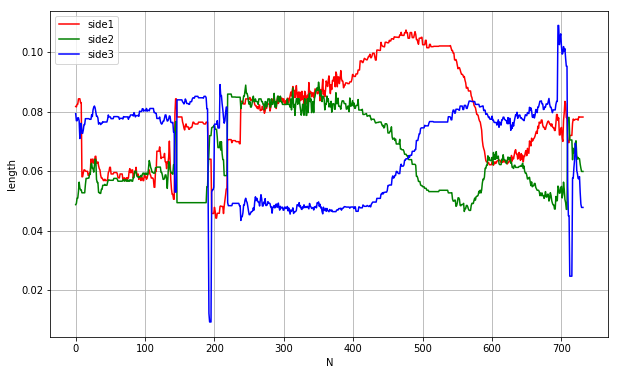

In [15]:
plot_sides(full_df)

In [21]:
def show_results(file_name='touchpoints.txt'):
    touchs = read_data(file_name)
    df_raw = pd.DataFrame(touchs)
    df_3touchs = df_raw[df_raw['Count']==3]['touches']
    sorted_by_id = [[t_dict['Position'] for t_dict in sorted(df_string, key=lambda k: k.get("id"))] for df_string in df_3touchs.tolist()]
    df = pd.DataFrame(sorted_by_id, columns=['1_touch', '2_touch', '3_touch'])
    first_touch = pd.DataFrame([t_dict for t_dict in df['1_touch']])
    second_touch = pd.DataFrame([t_dict for t_dict in df['2_touch']])
    third_touch = pd.DataFrame([t_dict for t_dict in df['3_touch']])
    full_df = pd.concat([first_touch, second_touch, third_touch], axis=1)
    full_df.columns=['X1','Y1','X2','Y2','X3','Y3']
    full_df['side1']=np.sqrt((full_df['X2']-full_df['X1'])**2 + (full_df['Y2']-full_df['Y1'])**2)
    full_df['side2']=np.sqrt((full_df['X3']-full_df['X2'])**2 + (full_df['Y3']-full_df['Y2'])**2)
    full_df['side3']=np.sqrt((full_df['X1']-full_df['X3'])**2 + (full_df['Y1']-full_df['Y3'])**2)
    
    full_df['side1_d'] = abs(full_df['side1']-np.mean(full_df['side1']))
    full_df['side2_d'] = abs(full_df['side2']-np.mean(full_df['side2']))
    full_df['side3_d'] = abs(full_df['side3']-np.mean(full_df['side3']))
    
    print('среднее отклонение сторона 1:', np.mean(full_df['side1_d']))
    print('среднее отклонение сторона 2:', np.mean(full_df['side2_d']))
    print('среднее отклонение сторона 3:', np.mean(full_df['side3_d']))
    plot_sides(full_df)

среднее отклонение сторона 1: 0.013388592011909638
среднее отклонение сторона 2: 0.011459867674784895
среднее отклонение сторона 3: 0.01464990016176282
mean side1: 0.07868984459606414
mean side2: 0.06555775355132988
mean side3: 0.067220985367569
max-min 1: 0.063200982894203
max-min 2: 0.04345146279012925
dmax-min 3: 0.09962070102414201


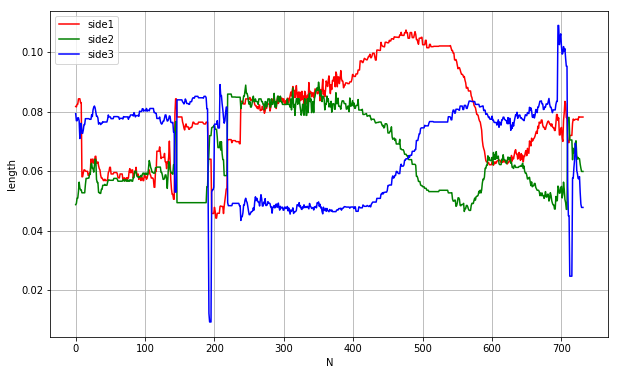

In [22]:
show_results('touchpoints.txt')

среднее отклонение сторона 1: 0.010229794643202852
среднее отклонение сторона 2: 0.006687881864524558
среднее отклонение сторона 3: 0.006840859123411019
mean side1: 0.09489409028443752
mean side2: 0.06431481642780915
mean side3: 0.06237520095693854
max-min 1: 0.09601270087398514
max-min 2: 0.05069719390028354
dmax-min 3: 0.05044673893943171


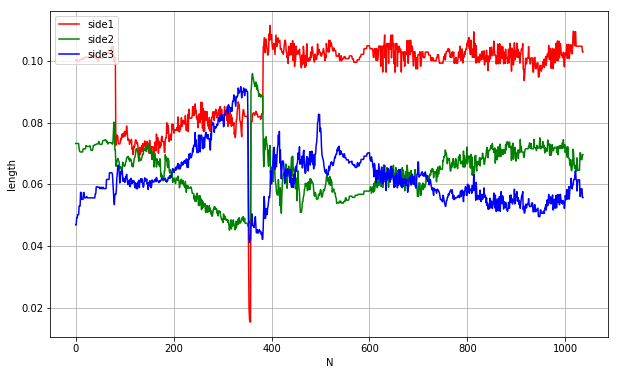

In [23]:
show_results('touchpoints-2.txt')

среднее отклонение сторона 1: 0.014117260709570796
среднее отклонение сторона 2: 0.016102810505075518
среднее отклонение сторона 3: 0.012354372314255057
mean side1: 0.0777313220095682
mean side2: 0.06973278704120281
mean side3: 0.07037552119409392
max-min 1: 0.1049040133806389
max-min 2: 0.11084823270435037
dmax-min 3: 0.06887963758561239


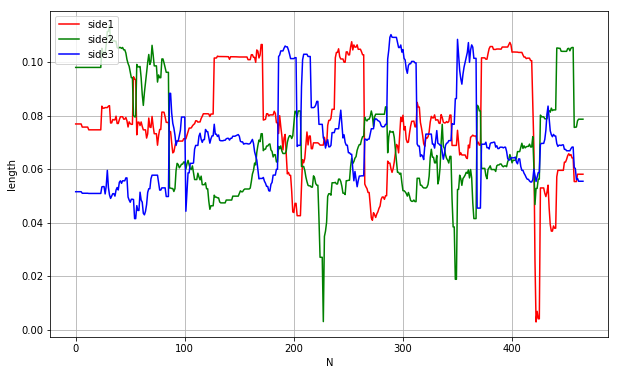

In [24]:
show_results('touchpoints-3.txt')

среднее отклонение сторона 1: 0.012325951974943537
среднее отклонение сторона 2: 0.014970173023574538
среднее отклонение сторона 3: 0.008932341525018839
mean side1: 0.07296647462839577
mean side2: 0.07752223128748056
mean side3: 0.06530213832254858
max-min 1: 0.05934849808270936
max-min 2: 0.05141283143358771
dmax-min 3: 0.037365863732132944


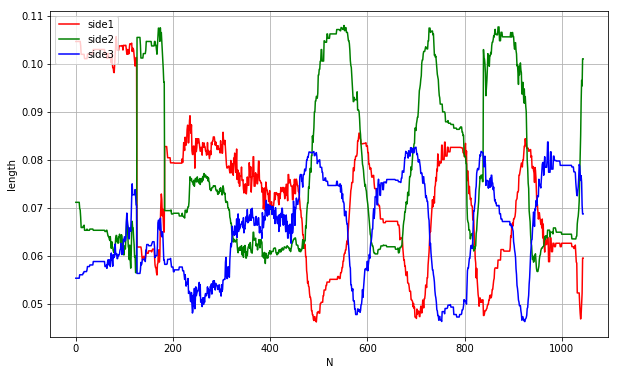

In [25]:
show_results('touchpoints-4.txt')